In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [4]:
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [5]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


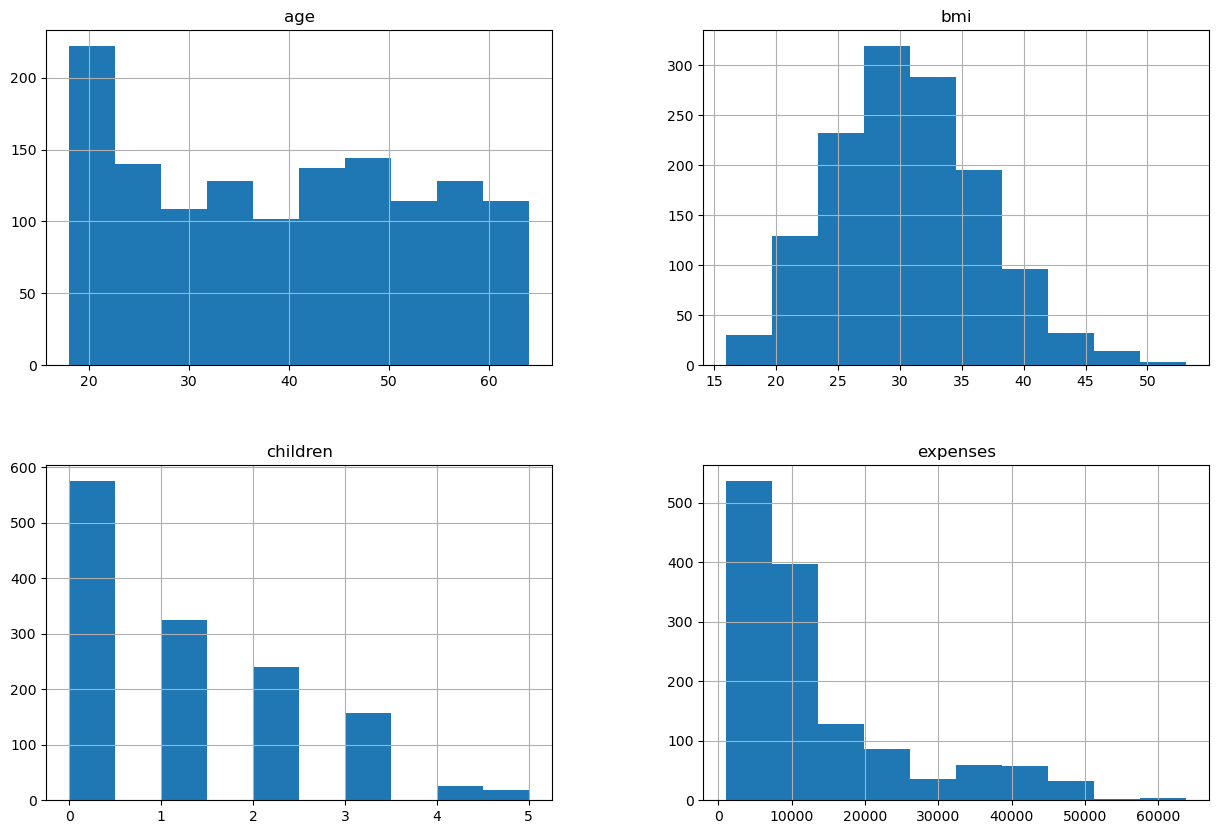

In [8]:
df.hist(figsize = (15,10))
plt.show()

In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]


age   sex   bmi  children smoker     region  expenses
581   19  male  30.6         0     no  northwest   1639.56

In [11]:
duplicates = df[df.duplicated(keep=False)]

In [12]:
duplicates

age   sex   bmi  children smoker     region  expenses
195   19  male  30.6         0     no  northwest   1639.56
581   19  male  30.6         0     no  northwest   1639.56

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()


0

In [15]:
df.shape

(1337, 7)

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [17]:
df['age'].value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [18]:
df['sex'].value_counts()


sex
male      675
female    662
Name: count, dtype: int64

In [19]:
df['bmi'].value_counts()

bmi
27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: count, Length: 275, dtype: int64

In [20]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [21]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [22]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [23]:
oe = OrdinalEncoder() # convert categorical values to numerical
df[cat_cols] = oe.fit_transform(df[cat_cols])

In [24]:
for col in cat_cols:
    df[col] = df[col].astype(int)

In [25]:
df


age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       3  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       1  21984.47
4      32    1  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       1  10600.55
1334   18    0  31.9         0       0       0   2205.98
1335   18    0  36.9         0       0       2   1629.83
1336   21    0  25.8         0       0       3   2007.95
1337   61    0  29.1         0       1       1  29141.36

[1337 rows x 7 columns]

In [26]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
expenses    float64
dtype: object

Histograms for Numerical Features:


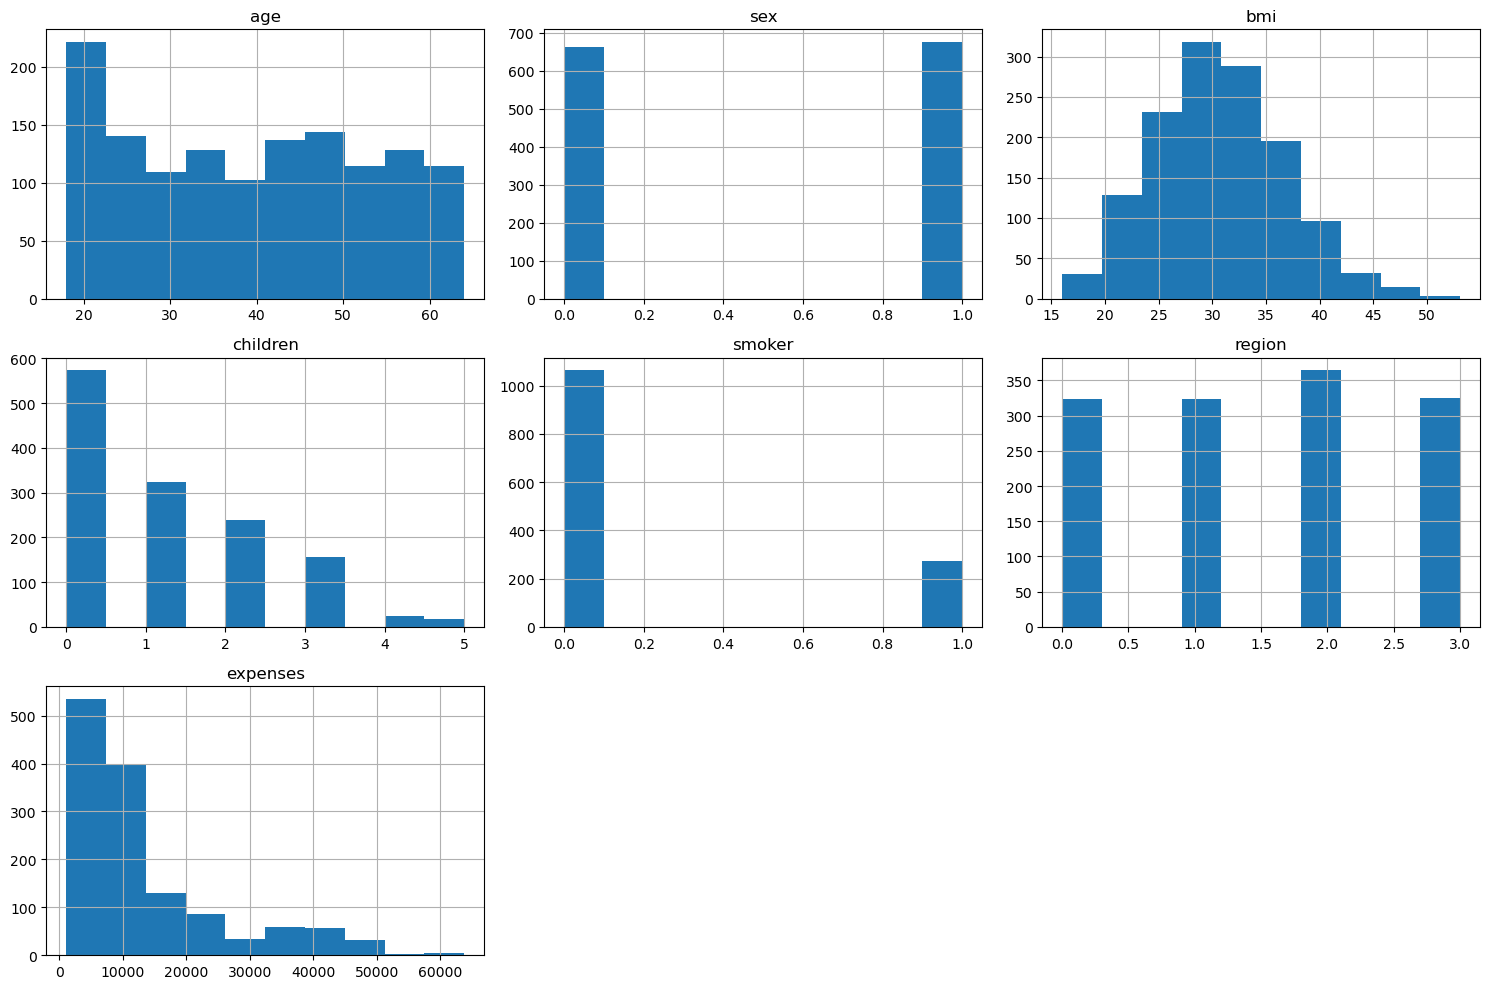

In [27]:
# Histograms for numerical columns
print("Histograms for Numerical Features:")
df.hist(figsize=(15, 10))
plt.tight_layout() # Adjusting layout to prevent overlapping titles
plt.show()


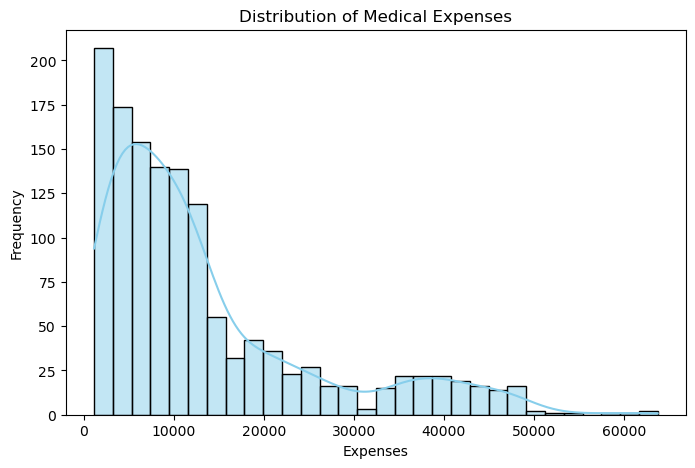

In [28]:
#Distribution of Medical Expenses
plt.figure(figsize=(8,5))
sns.histplot(df['expenses'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Medical Expenses')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()


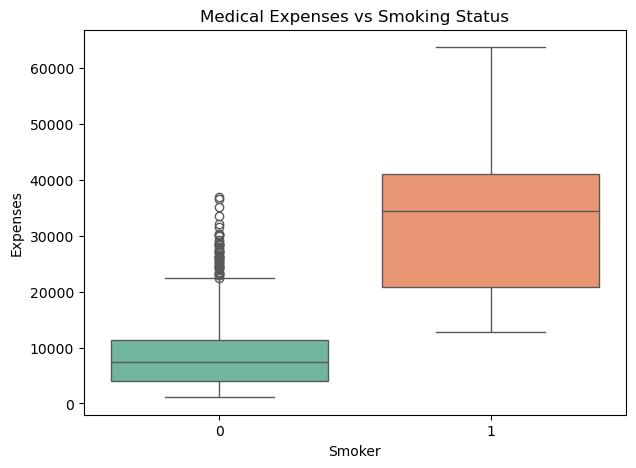

In [29]:
#2.Medical Expenses by Smoking Status
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='expenses', data=df, palette='Set2')
plt.title('Medical Expenses vs Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Expenses')
plt.show()


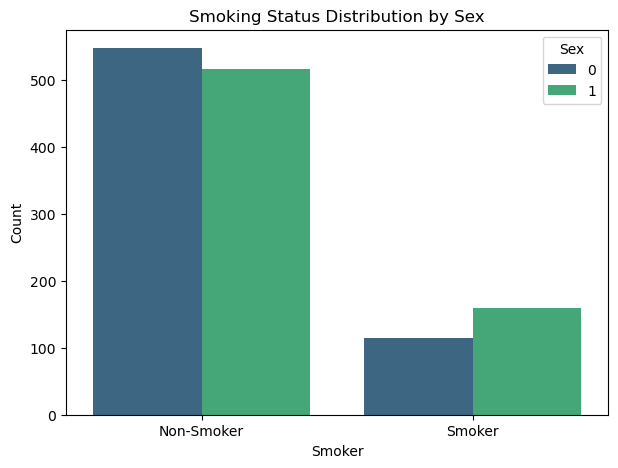

In [30]:
#3. Smoking status distribution by sex
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='smoker', hue='sex', palette='viridis')
plt.title('Smoking Status Distribution by Sex')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker']) # Assuming 0 is non-smoker and 1 is smoker
plt.legend(title='Sex')
plt.show()

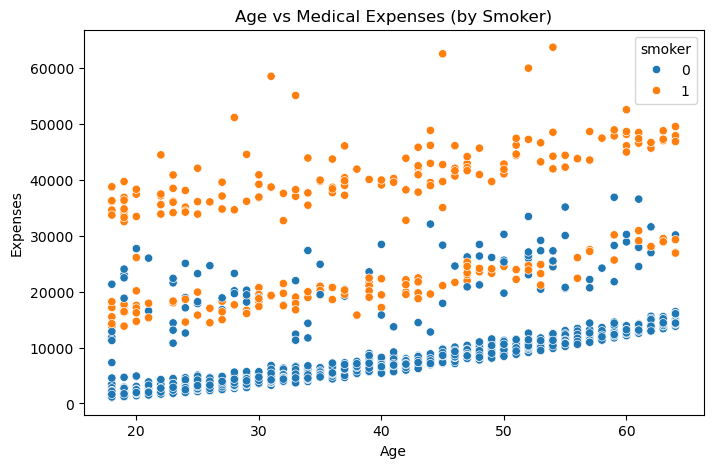

In [31]:
#4. Age v/s expenses
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df)
plt.title('Age vs Medical Expenses (by Smoker)')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()
#Older individuals tend to have higher expenses, especially smokers.

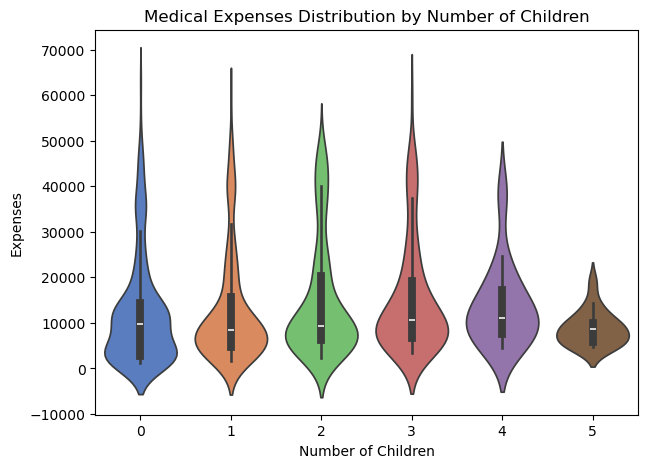

In [32]:
#5. BMI vs Expenses
plt.figure(figsize=(7,5))
sns.violinplot(x='children', y='expenses', data=df, palette='muted')
plt.title('Medical Expenses Distribution by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Expenses')
plt.show()
#checking if family size affects cost


Correlation Matrix:


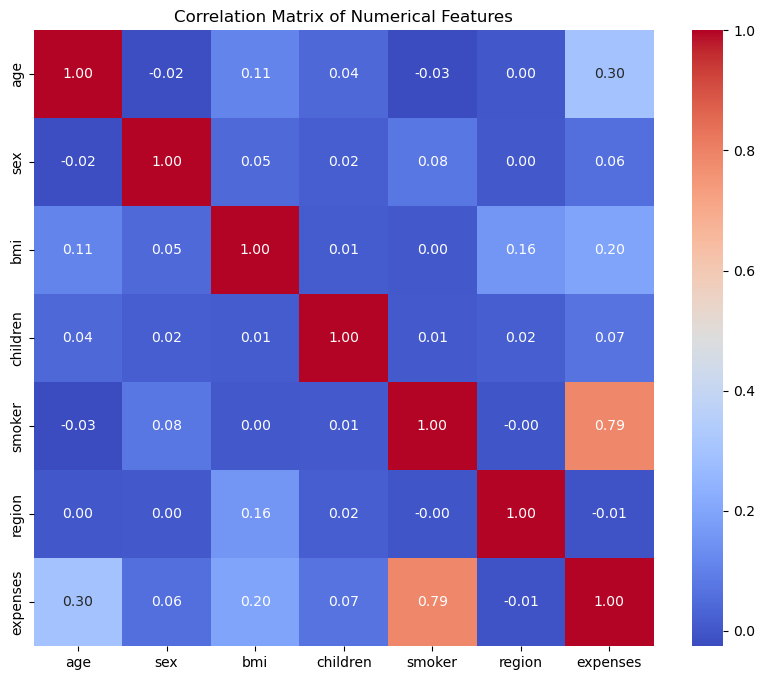

In [33]:
# Correlation matrix for numerical columns
print("Correlation Matrix:")
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
 #Reveals how strongly features like age, BMI, and children correlate with expenses.

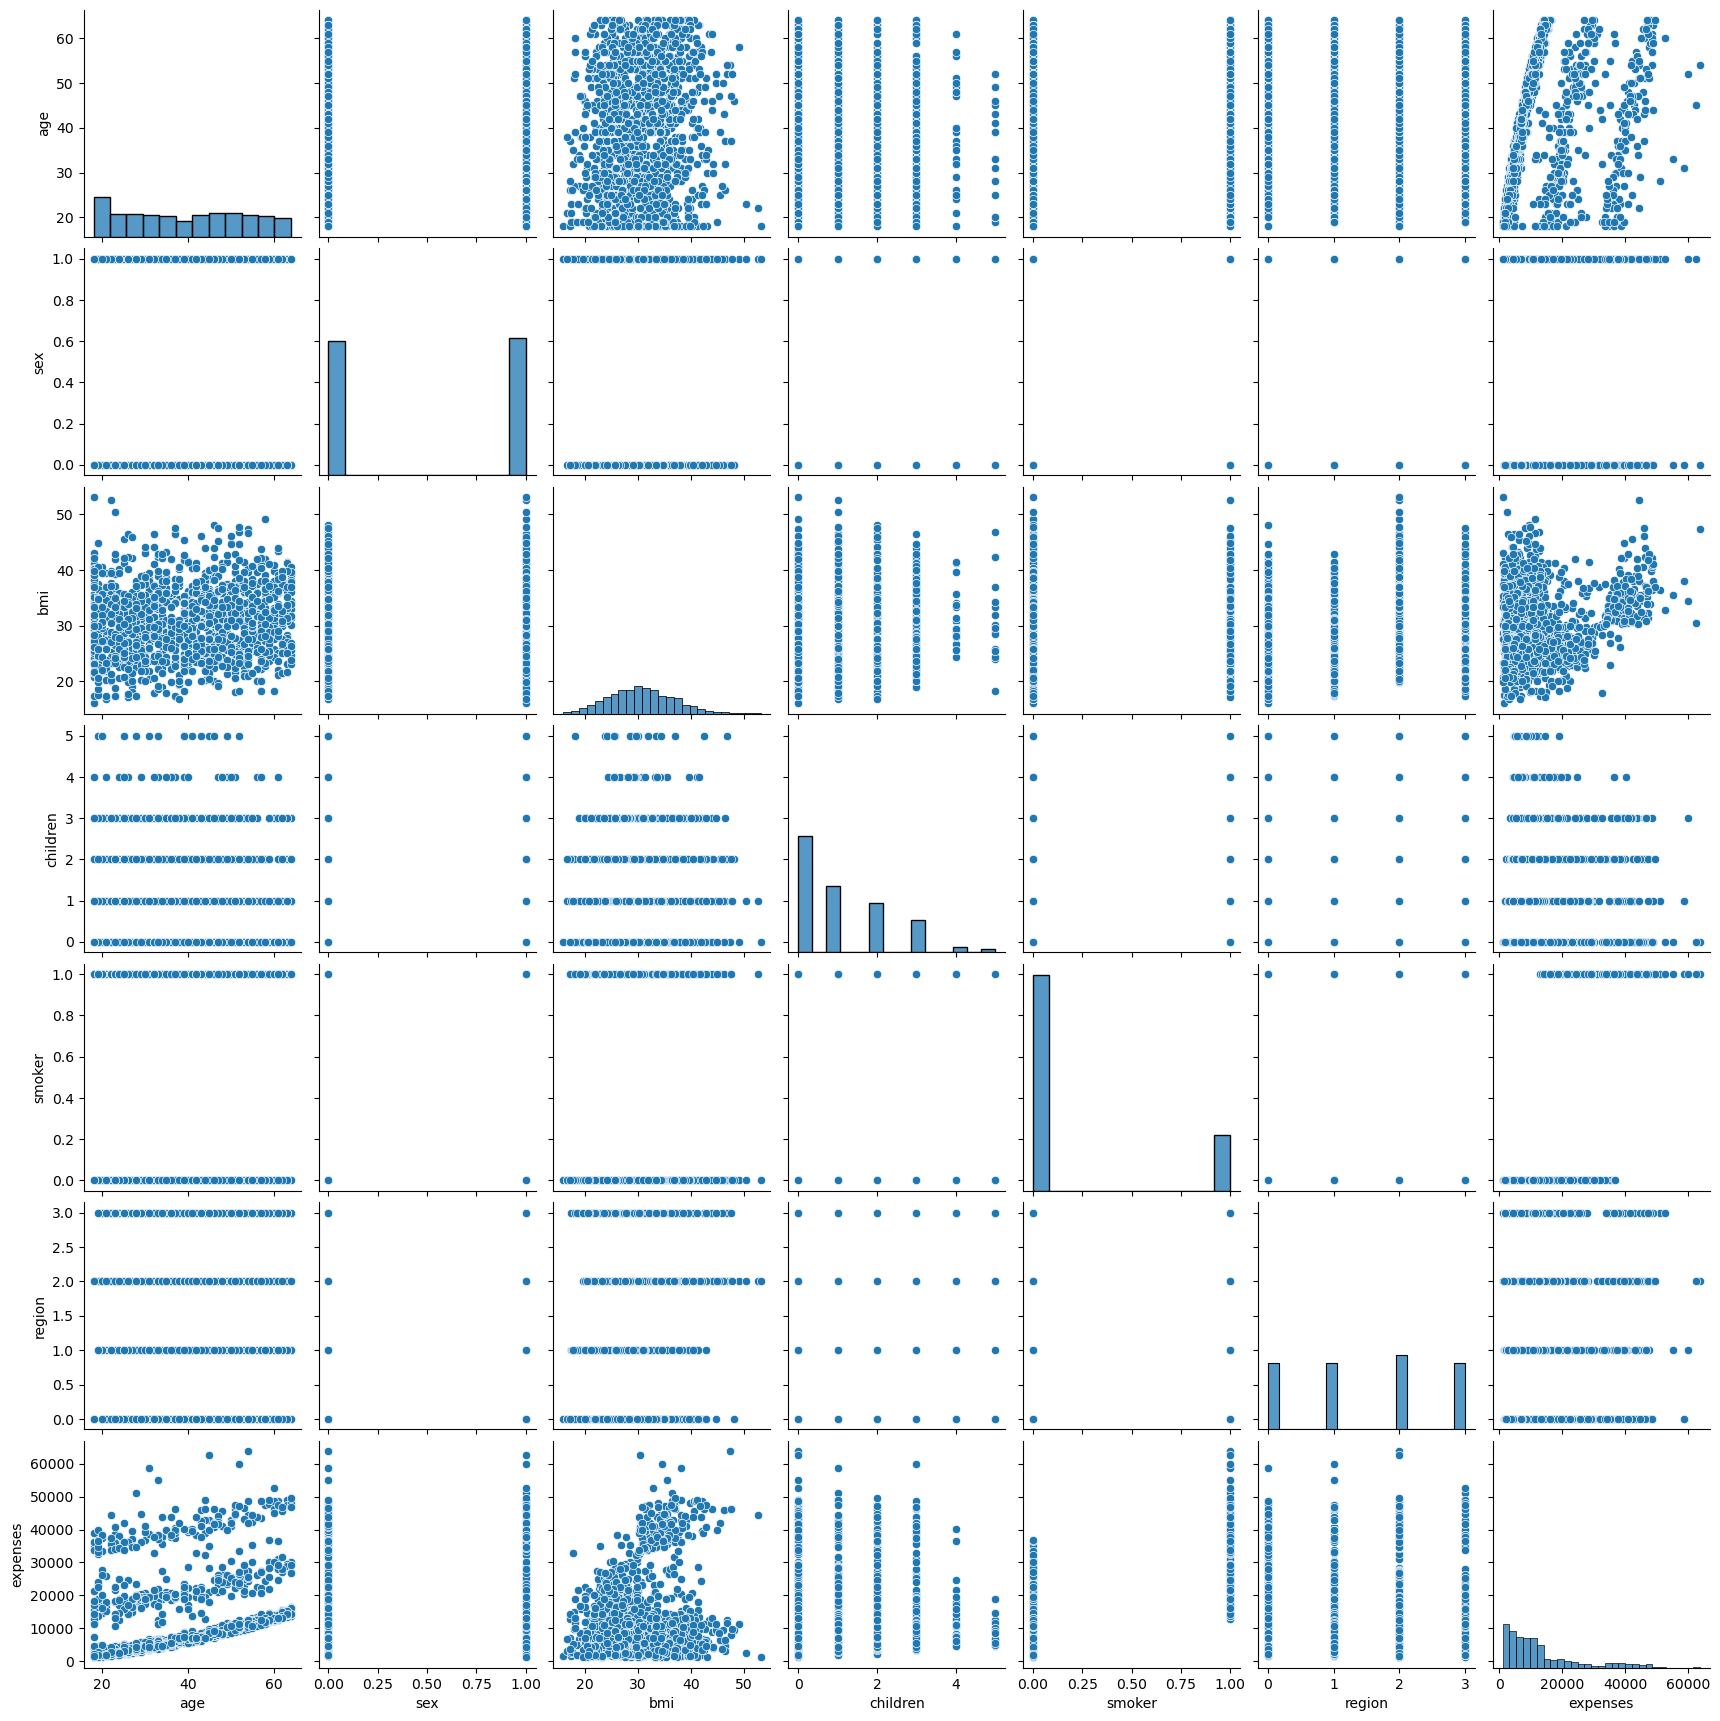

In [34]:
sns.pairplot(df)

In [35]:
#Outlier handling with capping method
def outlier_detection(data, columns):

    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

#Using the function that we juct created
outlier_detection(df,df.select_dtypes(include=np.number).columns)

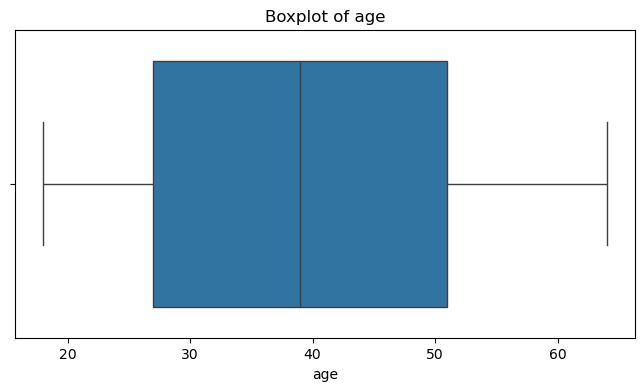

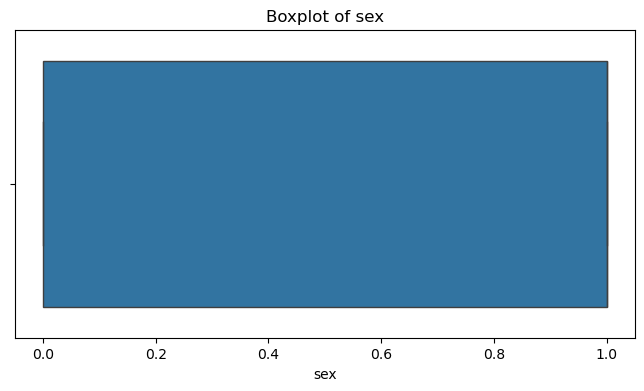

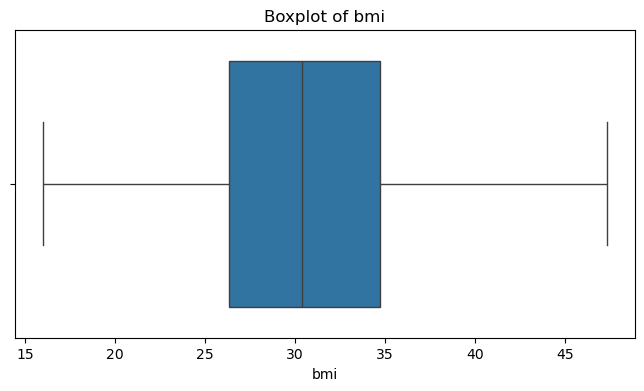

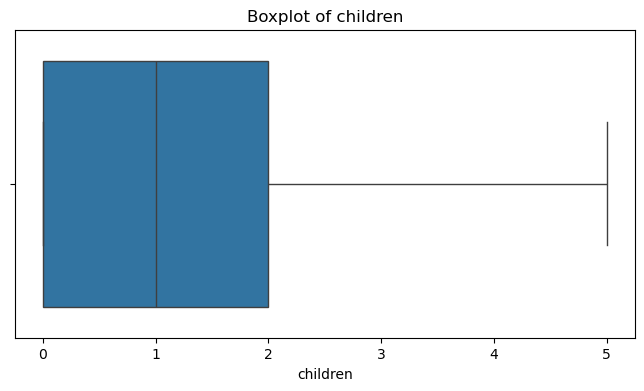

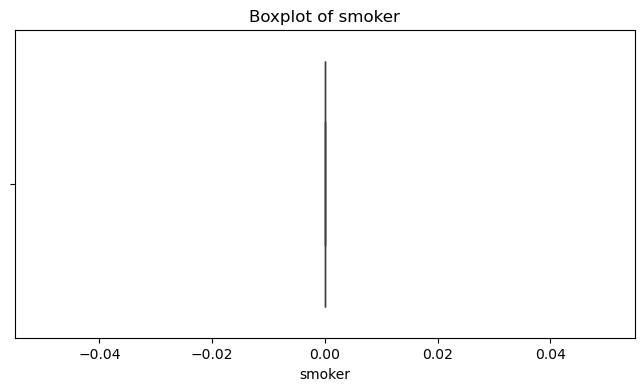

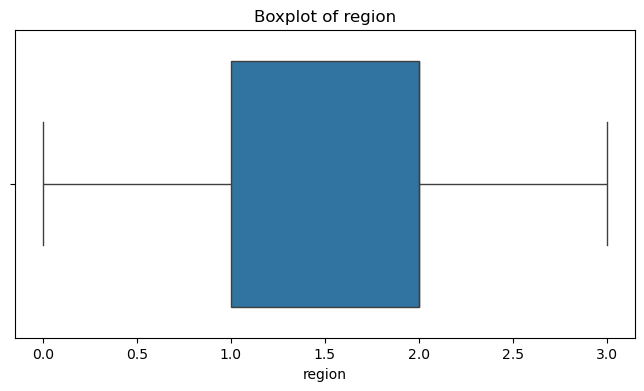

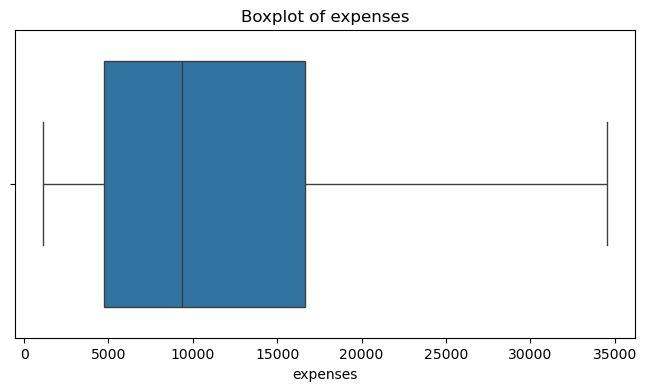

In [36]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [38]:
# Convert categorical to numeric
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
X = df_encoded.drop("expenses", axis=1)
y = df_encoded["expenses"]

In [39]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Standardize numeric columns
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [41]:
# Step 3: Define Evaluation Function
def evaluate_model(name, model, X_test, y_test, result_dict):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"🔹 {name}")
    print(f"   → R²: {r2:.3f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MSE: {mse:.2f}\n")
    result_dict[name] = {'R2': r2, 'RMSE': rmse, 'MSE': mse, 'MAE': mae}

In [42]:
# Step 4: Train Base Models
results_base = {}
base_models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}
for name, model in base_models.items():
    model.fit(X_train, y_train)
    evaluate_model(name + " (Base)", model, X_test, y_test, results_base)

🔹 Linear Regression (Base)
   → R²: 0.140 | RMSE: 10026.96 | MAE: 8078.08 | MSE: 100539871.30

🔹 Lasso Regression (Base)
   → R²: 0.140 | RMSE: 10026.93 | MAE: 8078.34 | MSE: 100539230.10

🔹 Decision Tree (Base)
   → R²: -0.770 | RMSE: 14383.32 | MAE: 9460.73 | MSE: 206879881.29

🔹 Random Forest (Base)
   → R²: -0.065 | RMSE: 11157.74 | MAE: 8817.24 | MSE: 124495183.75

🔹 SVM (Base)
   → R²: -0.121 | RMSE: 11445.65 | MAE: 8054.53 | MSE: 131002826.61

🔹 KNN (Base)
   → R²: -0.095 | RMSE: 11313.38 | MAE: 8622.87 | MSE: 127992641.08

🔹 XGBoost (Base)
   → R²: -0.348 | RMSE: 12551.95 | MAE: 9401.24 | MSE: 157551488.89



In [43]:
# Step 5: Tune Models with GridSearch
results_tuned = {}

# Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [100, 150], 'max_depth': [None, 10]}, cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)
evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, X_test, y_test, results_tuned)

# SVM
svr_grid = GridSearchCV(SVR(), {'C': [1, 10], 'kernel': ['rbf', 'linear']}, cv=3, n_jobs=-1)
svr_grid.fit(X_train, y_train)
evaluate_model("SVM (Tuned)", svr_grid.best_estimator_, X_test, y_test, results_tuned)

# KNN
knn_grid = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}, cv=3, n_jobs=-1)
knn_grid.fit(X_train, y_train)
evaluate_model("KNN (Tuned)", knn_grid.best_estimator_, X_test, y_test, results_tuned)

# XGBoost
xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'),
    {'n_estimators': [100, 150], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.05]}, cv=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
evaluate_model("XGBoost (Tuned)", xgb_grid.best_estimator_, X_test, y_test, results_tuned)

🔹 Random Forest (Tuned)
   → R²: 0.001 | RMSE: 10804.92 | MAE: 8565.29 | MSE: 116746340.25

🔹 SVM (Tuned)
   → R²: -0.108 | RMSE: 11376.70 | MAE: 7774.58 | MSE: 129429376.07

🔹 KNN (Tuned)
   → R²: 0.013 | RMSE: 10737.43 | MAE: 8276.43 | MSE: 115292483.23

🔹 XGBoost (Tuned)
   → R²: 0.058 | RMSE: 10493.33 | MAE: 8408.82 | MSE: 110110016.20



In [44]:
#Step 6: Plot Comparison Charts
def make_comparison_df(metric):
    models = []
    base = []
    tuned = []
    for model_name in results_base.keys():
        short_name = model_name.split(" (Base)")[0]
        models.append(short_name)
        base.append(results_base[model_name][metric])
        tuned_model = short_name + " (Tuned)"
        tuned.append(results_tuned.get(tuned_model, {}).get(metric, np.nan))
    return pd.DataFrame({"Model": models, "Base": base, "Tuned": tuned})

def plot_comparison(metric):
    df = make_comparison_df(metric)
    x = np.arange(len(df))
    width = 0.35
    plt.figure(figsize=(12, 6)) # Increased figure size
    base_bars = plt.bar(x - width/2, df['Base'], width, label='Base', color='skyblue')
    tuned_bars = plt.bar(x + width/2, df['Tuned'], width, label='Tuned', color='lightgreen')
   
    # Add values on top of the bars
    for bars in [base_bars, tuned_bars]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., yval, f'{yval:.3f}' if metric == 'R2' else f'{yval:.0f}', va='bottom', ha='center', fontsize=8)


    plt.xticks(x, df['Model'], rotation=45, ha='right') # Adjusted rotation and alignment
    plt.ylabel(metric)
    plt.title(f"{metric} Score: Base vs Tuned")
    plt.legend()
    plt.tight_layout() # Add tight_layout for better spacing
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


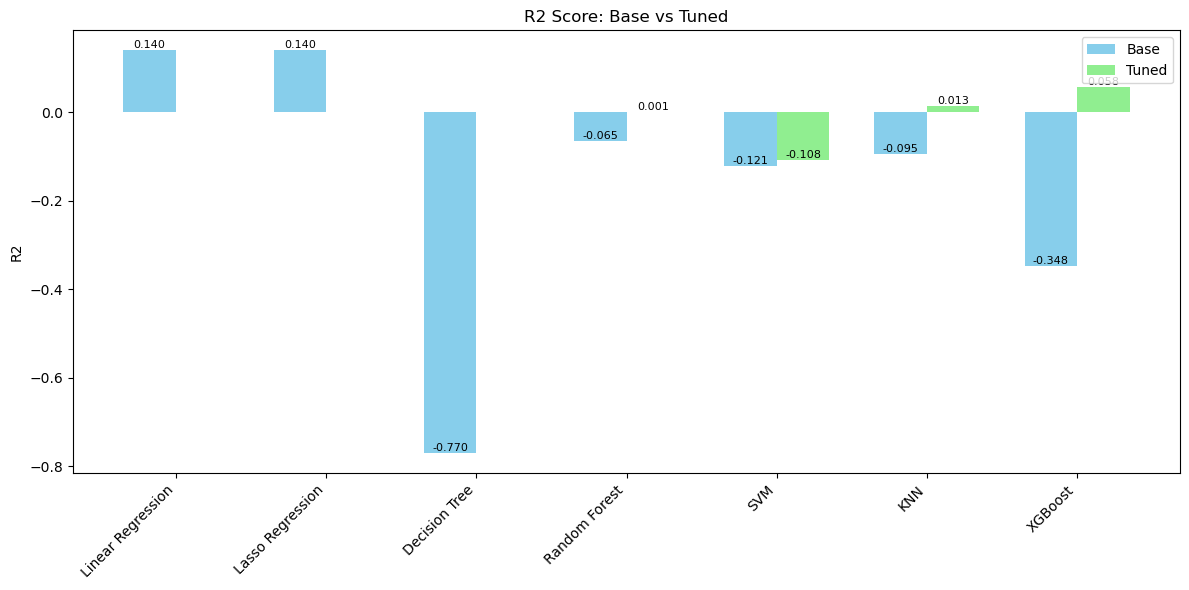

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


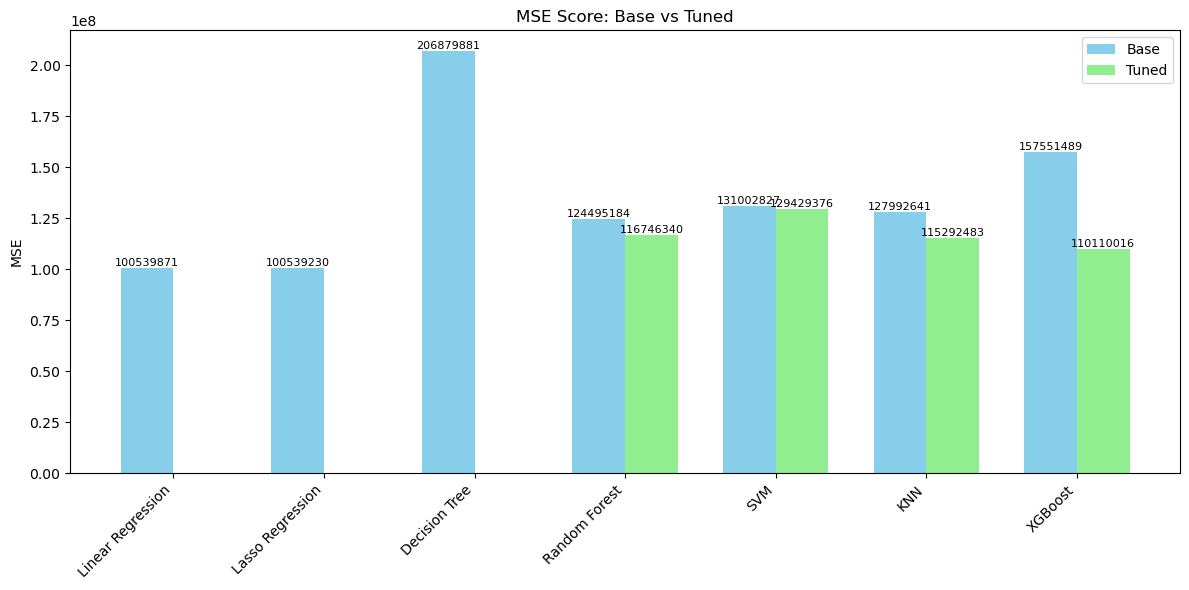

In [45]:
# 🔍 Visualize All Metrics
plot_comparison("R2")
plot_comparison("RMSE")
plot_comparison("MAE")
plot_comparison("MSE")

In [46]:
# Combine base and tuned results into one DataFrame
all_results = pd.DataFrame(results_base).T  # Start with base
if 'results_tuned' in globals():
    tuned_df = pd.DataFrame(results_tuned).T
    all_results = pd.concat([all_results, tuned_df])

# Sort by R² score
best_model = all_results.sort_values(by="R2", ascending=False).head(1)
print("Best Model Based on R² Score:")
print(best_model)


Best Model Based on R² Score:
                               R2          RMSE           MSE          MAE
Lasso Regression (Base)  0.139614  10026.925256  1.005392e+08  8078.344474


In [47]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)


Lasso()

In [48]:
import joblib
joblib.dump(lasso_model, 'medical_expense_model.pkl')


['medical_expense_model.pkl']